In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
# READ INTERACTOME DATA FROM TEXT FILE
file = open('HIPPIE-current.mitab.txt') # data from http://cbdm-01.zdv.uni-mainz.de/~mschaefer/hippie/index.php
intA, intB = [], []
interactions = []
for line in file:
    splitline = line.split('\t')
    iA = splitline[2].lstrip('uniprotkb:')
    iB = splitline[3].lstrip('uniprotkb:')
    intA += [iA]
    intB += [iB]
    interactions += [[iA, iB]]
file.close()

In [3]:
# CONVERT INTERACTOME DATA TO NETWORK
interactome = nx.Graph()
interactome.add_nodes_from(intA)
interactome.add_nodes_from(intB)
interactome.add_edges_from(interactions)

In [4]:
# SOME NETWORK PROPERTIES
print('Number of nodes:')
num_nodes = nx.number_of_nodes(interactome)
print(num_nodes)

print('Number of edges:')
num_edges = nx.number_of_edges(interactome)
print(num_edges)

print('Number of components:')
components = [len(c) for c in sorted(nx.connected_components(interactome),
                                     key=len, reverse=True)]
print(len(components))

print('Components by size (i.e., number of nodes):')
print(components)

Number of nodes:
17563
Number of edges:
384255
Number of components:
26
Components by size (i.e., number of nodes):
[17530, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Questions
1. What does it mean if a network has a component of size 1?
2. What are possible reasons for the existence of so many size-1 components in the interactome?

In [8]:
# GET DEGREE SEQUENCE AND DEGREE DISTRIBUTION
degree_sequence = sorted([d for n, d in interactome.degree()], reverse=True)
degree_histogram, bins = np.histogram(degree_sequence, 
                                      bins=range(np.max(degree_sequence)+2))
degree_distribution = degree_histogram/len(degree_sequence)

# GET DEGREE DISTRIBUTION FOR A RANDOM NETWORK WITH THE SAME NUMBER OF NODES AND EDGES
G = nx.erdos_renyi_graph(num_nodes, num_edges/(num_nodes*(num_nodes-1)/2))
degree_sequence_random = sorted([d for n, d in G.degree()], reverse=True)
degree_histogram_random, bins_random = np.histogram(degree_sequence_random, 
                                                    bins=range(np.max(degree_sequence_random)+2))
degree_distribution_random = degree_histogram_random/len(degree_sequence_random)

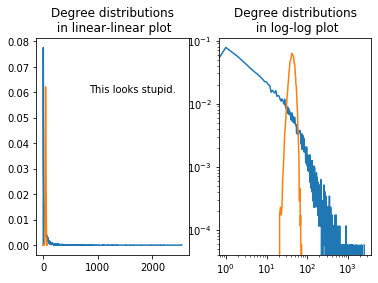

In [9]:
# PLOT DEGREE DISTRIBUTIONS
ax = plt.subplot(121)
plt.title('Degree distributions\n in linear-linear plot')
plt.plot(bins[:-1],degree_distribution)
plt.plot(bins_random[:-1],degree_distribution_random)
ax.text(0.35, 0.75, 'This looks stupid.', transform=ax.transAxes)

plt.subplot(122)
plt.title('Degree distributions\n in log-log plot')
plt.loglog(bins[:-1],degree_distribution)
plt.loglog(bins_random[:-1],degree_distribution_random)

### Questions
1. Why is the log-log plots more informative? 
2. What are differences between the degree distributions of the protein-interaction network and the random network?

In [39]:
# GET PROTEINS WITH GREATEST DEGREE CENTRALITY
centrality_dict = nx.degree_centrality(interactome)
highest_ranking_proteins = sorted(centrality_dict, key=centrality_dict.get)[-10:]
print(highest_ranking_proteins)

['BRCA1_HUMAN', 'ESR1_HUMAN', 'CUL3_HUMAN', 'TRI25_HUMAN', '-', 'SUMO2_HUMAN', 'U5S1_HUMAN', 'ESR2_HUMAN', 'JUN_HUMAN', 'NTRK1_HUMAN']


### Questions
1. Are the proteins with the ten largest centrality values different when you use a different centrality measure?
2. You can look up the proteins at https://www.uniprot.org/ . Do you think these proteins could be good drug targets? Why/why not?
3. How can one improve this method for finding better potential drug targets?